In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Unsupervised Learning
##k-means Clustering
##EM algorithm

## k-means Clustering

- Initialize cluster centroids $\mu_1 \dots \mu_k \in ℝ^n$
- Repeat until convergence
    - Set $c^{(i)} := \text{argmin}_j ||x^{(i)}-\mu_j||_2$  (L2 norm)
    - for $j =1,\dots,k$
    
    $$
    \mu_j :=\frac{\sum_{i=1}^m 𝟙[c^{(i)}=j]x^{(i)}}{\sum_{i=1}^m𝟙[c^{(i)}=j]}
    $$

Cost Function (c = assignments, mu = centroids)

$$
J(c,\mu) = \sum_{i=1}^m||x^{(i)}-\mu_j||_2
$$
(L2 norm: $||x||_{2}=\sqrt{x_{1}^{2}+x_{2}^{2}+\dots +x_{n}^{2}}$)

## Density Estimation

anomaly detection

Gaussian Model

Suppose there’s a latent(hidden/unobserved) random variable z,

and xi,zi are distributed $P(x^{(i)}|z^{(i)})P(z^{(i)})$

where z(i) ~ multinomial(phi) $z \in \{1, \dots, k\}$ (multinomial probability of x(i) is from which gaussian)

$x^{(i)}|z^{(i)}=j \sim N(\mu_j,\Sigma_j)$ → x follows Gaussian for j cluster

(different from GDA → gda only has 2 gaussian but k, same covariance but different)

If we knew the z(i), can use MLE

$$
l(\phi, \mu, \Sigma)
= \sum_{i=1}^m\log P(x^{(i)},z^{(i)};\phi,\mu,\Sigma) \\ \phi_j = \frac1m\sum_{i=1}^m1[z^{(i)}=j]
\\\mu_j = \frac{\sum_{i=1}^m 1[z^{(i)}=j]x^{(i)}}{\sum_{i=1}^m1[z^{(i)}=j]}
$$

but we dont know → EM

### EM Algorithm

EM is softer way than k-means

E-step construct lower-bound curve →

M-step find theta that Maximizes the curve →

repeat until convergence

**E-step (Guess value of z(i)’s)**

Set w(i)j ( is how much x(i) is assigned to the mu_j gaussian )

$$
w^{(i)}_j = P(z^{(i)}=j|x^{(i)};\phi,\mu,\Sigma)\\= \frac{P(x^{(i)}|z^{(i)}=j)P(z^{(i)}=j)}{\sum_{l=1}^k P(x^{(i)}|z^{(i)}=l)P(z^{(i)}=l)}
$$

upper-left term = Gaussian, upper-right term = $\phi_j$

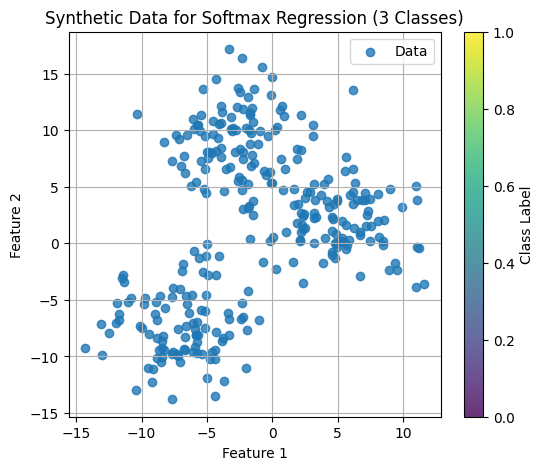

In [9]:
from sklearn.datasets import make_blobs

np.random.seed(0)
N_samples = 300
n_features = 2
n_classes = 3
X, Y = make_blobs(n_samples=N_samples, n_features=n_features, centers=n_classes,
                  cluster_std=3.0, random_state=42)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], label='Data', alpha=0.8)
plt.title('Synthetic Data for Softmax Regression (3 Classes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class Label')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
def L2norm(x, mu):
    examples = x.shape[0]
    mu_cnt = mu.shape[0]
    result = np.zeros((examples, mu_cnt))
    for i in range(mu_cnt):
        entry = x - np.repeat(mu[i].reshape(1,-1), examples, axis = 0)
        entry = entry * entry
        entry = np.sum(entry, axis = 1)
        entry = np.sqrt(entry)
        result[:, i] = entry

    return result

def one_hot_encode(Y, num_classes):
    N = Y.shape[0]
    one_hot_Y = np.zeros((N, num_classes))
    # Ensure Y is flattened to 1D for advanced indexing
    one_hot_Y[np.arange(N), Y.flatten()] = 1
    return one_hot_Y

def kmeans(X, cluster_cnt, epoch = 100):
    n_features = X.shape[1]
    n_examples = X.shape[0]

    center_idx = np.random.rand(cluster_cnt) * n_examples
    center_idx = center_idx.astype(int)
    centers = np.zeros((3,2))
    for i in range(cluster_cnt):
        centers[i] = X[center_idx[i]]

    center_of_examples = np.zeros((n_examples,1))
    for i in range(epoch):
        # E-step
        l2norm = L2norm(X, centers)
        center_of_examples_idx = np.argmax(l2norm, axis = 1)
        center_of_examples_onehot = one_hot_encode(center_of_examples_idx, cluster_cnt)

        # M-step
        new_centers = (center_of_examples_onehot.T @ X)
        cnt = np.sum(center_of_examples_onehot, axis=0)[:, None]
        mask = cnt[:,0] == 0
        cnt[mask] = 1
        new_centers = new_centers / cnt

        new_centers[mask] = centers[mask]
        if (np.all(np.abs(centers - new_centers) < 1e-9)): break

        centers = new_centers


    return centers, center_of_examples_idx




centers, idx = kmeans(X, 3, 1000)
print(centers)
print(idx)

[[ -0.96023274  -3.06795364]
 [-12.24781887  -5.15728458]
 [ -2.09010475   8.93661218]]
[0 0 2 2 0 0 2 0 2 2 2 0 0 2 0 2 0 0 2 2 2 2 0 0 2 0 0 2 0 2 2 2 0 2 1 2 0
 0 0 2 0 2 0 2 2 2 0 0 0 0 0 0 0 2 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2
 2 0 1 0 2 0 2 2 0 2 0 0 0 2 0 2 1 2 0 2 2 0 0 2 0 0 0 2 0 2 2 0 2 2 0 0 0
 2 2 2 2 0 0 2 0 0 2 0 2 0 0 0 0 2 0 0 2 2 0 2 2 0 0 0 2 0 2 2 0 2 0 0 0 2
 0 2 2 0 0 1 2 0 0 0 0 2 2 0 0 0 2 0 0 2 2 2 2 2 0 2 0 0 0 2 0 0 0 2 0 0 2
 1 0 2 0 0 0 0 0 0 0 2 0 0 2 0 2 2 0 2 2 2 0 0 0 2 2 0 0 2 0 0 0 0 2 0 0 0
 0 0 2 0 0 0 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1
 2 2 2 0 2 0 2 0 0 0 2 2 0 2 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 2
 0 2 0 0]


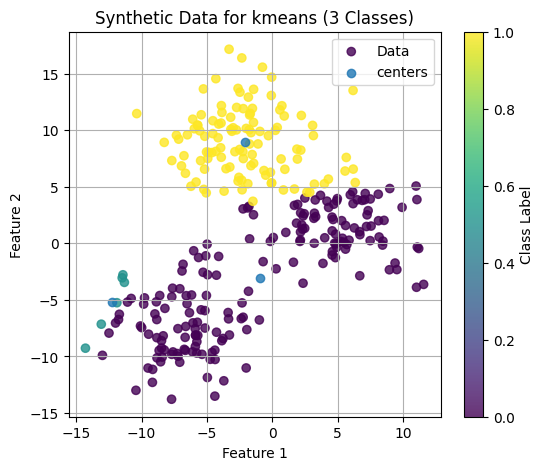

In [50]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=idx, label='Data', alpha=0.8)
plt.scatter(centers[:, 0], centers[:, 1], label='centers', alpha=0.8)
plt.title('Synthetic Data for kmeans (3 Classes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class Label')
plt.legend()
plt.grid(True)
plt.show()